In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet 

In [3]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print('shape of diabetes.data: ', diabetes.data.shape)

shape of diabetes.data:  (442, 10)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [5]:
trn_df=diabetes.data 
tst_df=diabetes.target

In [6]:
trn_df

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
tst_df

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trn_df, tst_df, test_size=0.3, random_state=10)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# print('{:.2f}%'.format((model.score(X_train, y_train))*100))

In [12]:
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [13]:
# print('{:.2f}%'.format((model.score(X_test, y_test))*100))

In [14]:
print('==== BMI 속성을 학습에 사용한 결과 ===')
print('훈련 데이터의 점수 : {:.2f}%'.format((model.score(X_train, y_train))*100))
print('테스트 데이터의 점수 : {:.2f}%'.format((model.score(X_test, y_test))*100))

==== BMI 속성을 학습에 사용한 결과 ===
훈련 데이터의 점수 : 46.07%
테스트 데이터의 점수 : 54.12%


In [15]:
# trn_df = pd.DataFrame(trn_df)

In [16]:
tst_df1 = tst_df.reshape(-1, 1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
tst_df1 = scaler.fit_transform(tst_df1)

In [18]:
tst_df1.shape

(442, 1)

In [19]:
scdf = pd.DataFrame(tst_df1, columns = ['x1_std'])
scdf

,x1_std
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496
...,...
437,0.335904
438,-0.625064
439,-0.261454
440,0.881318


In [20]:
print('표준화 이전 혈당값 : \n', tst_df[:5])

표준화 이전 혈당값 : 
 [151.  75. 141. 206. 135.]


In [21]:
print('표준화 이후 혈당값 : \n', scdf['x1_std'].head())

표준화 이후 혈당값 : 
 0   -0.014719
1   -1.001659
2   -0.144580
3    0.699513
4   -0.222496
Name: x1_std, dtype: float64


In [35]:
trn_df1

NameError: name 'trn_df1' is not defined

In [22]:
k = []
k.append(trn_df[:10])

In [23]:
l = []
k.append(tst_df[:10])

In [32]:
u = np.corrcoef(k)

ValueError: m has more than 2 dimensions

In [ ]:
sns.heatmap(data = u, annot = True)

In [24]:
j = trn_df[:10]

In [25]:
o = tst_df[:10]

In [26]:
# sns.set(rc = {'figure.figsize' : (20, 20)})
# correlation_matrix = k.corr().round(2)
# sns.heatmap(data = correlation_matrix, annot = True)

In [27]:
h = np.corrcoef(j)

<AxesSubplot:>

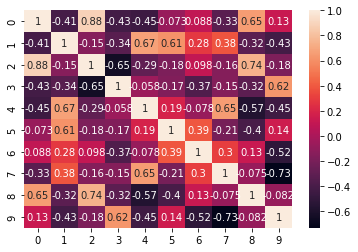

In [28]:
sns.heatmap(data = h, annot = True)

In [31]:
# g = np.corrcoef(o)
# sns.heatmap(data = g, annot = True)